In [ ]:
"""Time complexity experiments for various methods are carried out elsewhere 
(by executing various scripts or code in various notebooks respectively).

This notebook serves observation purpose only.
"""

In [18]:
import sqlite3
import collections as coll
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [19]:
mn_word2vec = 'word2vec'
mn_cf = 'cf'
mn_svd = 'svd'
mn_content_based = 'content_based'
mn_list = [mn_word2vec, mn_cf, mn_svd, mn_content_based]

table_name__word2vec = 'metrics__chap4_exp4_time_complexity__N_20__iter_30__da_1M'
table_name__cf = 'metrics__chap4_exp4_time_complexity__CF__N_20__da_1M'
table_name__svd = 'metrics__chap4_exp4_time_complexity__SVD__N_20__da_1M'
table_name__content_based = 'metrics__chap4_exp4_time_complexity__content_based__N_20__da_1M'

table_name_list = [table_name__word2vec, table_name__cf, table_name__svd, table_name__content_based]

In [20]:
cx = sqlite3.connect('my_metrics.db')
cur = cx.cursor()

after padding: {'content_based': {0.7: (0.0, 53.0, 53.0), 0.9: (0.0, 17.0, 17.0), 0.6: (0.0, 70.0, 70.0), 0.8: (0.0, 34.0, 34.0)}, 'word2vec': {0.7: (13.0, 19.0, 32.0), 0.9: (17.0, 7.0, 24.0), 0.6: (11.0, 22.0, 33.0), 0.8: (15.0, 13.0, 28.0)}, 'svd': {0.7: (36.0, 47.0, 83.0), 0.9: (42.0, 17.0, 59.0), 0.6: (35.0, 64.0, 99.0), 0.8: (39.0, 31.0, 70.0)}, 'cf': {0.7: (0.0, 333.0, 333.0), 0.9: (0.0, 144.0, 144.0), 0.6: (0.0, 374.0, 374.0), 0.8: (0.0, 253.0, 253.0)}}
all_tp: [0.6, 0.7, 0.8, 0.9]

[[(11.0, 22.0, 33.0), (13.0, 19.0, 32.0), (15.0, 13.0, 28.0), (17.0, 7.0, 24.0)], [(0.0, 374.0, 374.0), (0.0, 333.0, 333.0), (0.0, 253.0, 253.0), (0.0, 144.0, 144.0)], [(35.0, 64.0, 99.0), (36.0, 47.0, 83.0), (39.0, 31.0, 70.0), (42.0, 17.0, 59.0)], [(0.0, 70.0, 70.0), (0.0, 53.0, 53.0), (0.0, 34.0, 34.0), (0.0, 17.0, 17.0)]]


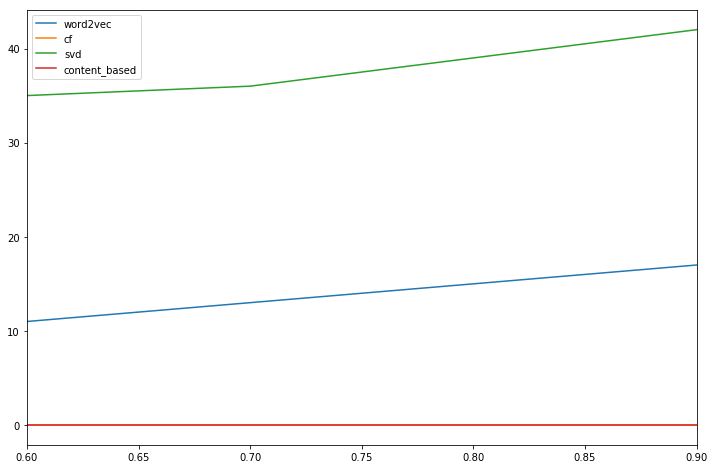

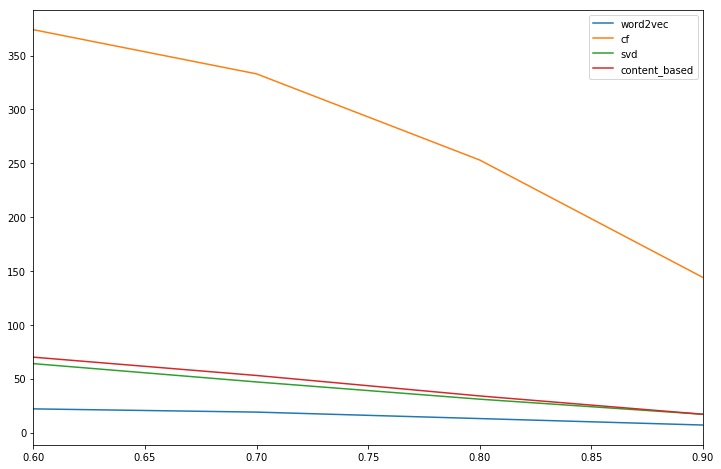

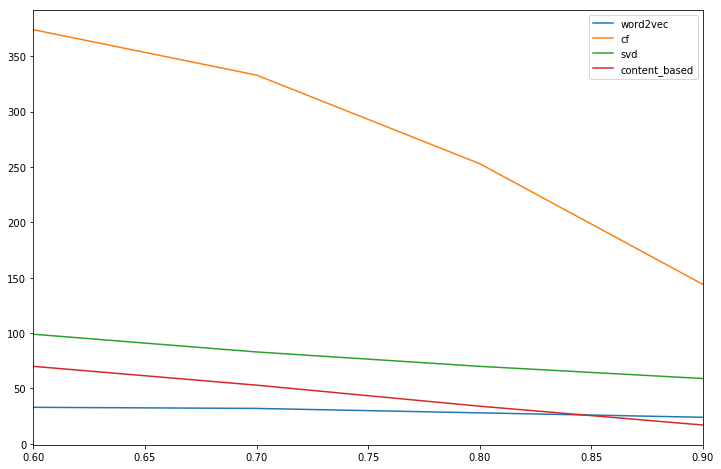

In [21]:
time_dict = coll.defaultdict(lambda: coll.defaultdict(list))

all_tp = set()

for mn, table_name in zip(mn_list, table_name_list):
    cur.execute('select * from %s where train_percent > 0.5' % table_name)
    #cur.execute('select * from %s' % table_name)
    data = cur.fetchall()

    for x in data:
        # tp: train percent
        row_id, s, mc, w, tp, precision, recall, f1, train_overhead, test_overhead, overall_overhead, time = x
        #print '%20s\t%15.9g\t%15.9g\t%15.9g' % (variant, precision, recall, f1)
        #print
        time_dict[mn][tp].append((train_overhead, test_overhead, overall_overhead))
        all_tp.add(tp)
all_tp = list(all_tp)        
all_tp.sort()
        
# calculate average    
time_dict_avg = {}
for mn in time_dict:
    time_dict_avg[mn] = {}
    for tp in time_dict[mn]:
        val = time_dict[mn][tp]
        #print val
        val_len = len(val)
        time_dict_avg[mn][tp] = tuple(  [sum([x[y] for x in val]) * 1. / val_len for y in range(0, len(val[0]))]  )
        
#print time_dict_avg

# padding
for tp in all_tp:
    for mn in time_dict_avg:
        if tp not in time_dict_avg[mn]:
            time_dict_avg[mn][tp] = (np.NaN, np.NaN, np.NaN)
print 'after padding:', time_dict_avg

# plotting
indexes = all_tp
print 'all_tp:', all_tp
print
print [[time_dict_avg[mn][tp] for tp in all_tp] for mn in mn_list]

###

time_overhead = ['train', 'test', 'overall']
for index_for_specific_time_overhead, time_overhead in enumerate(time_overhead):
    values = zip(*[[time_dict_avg[mn][tp][index_for_specific_time_overhead] for tp in all_tp] for mn in mn_list])
    values = np.array(values)
    #print 'values[0:', values[0]
    df = pd.DataFrame(values, index=indexes, columns=mn_list)
    
    df.plot()
    fig = plt.gcf()
    fig.set_size_inches(12, 8, forward=True)

plt.show()

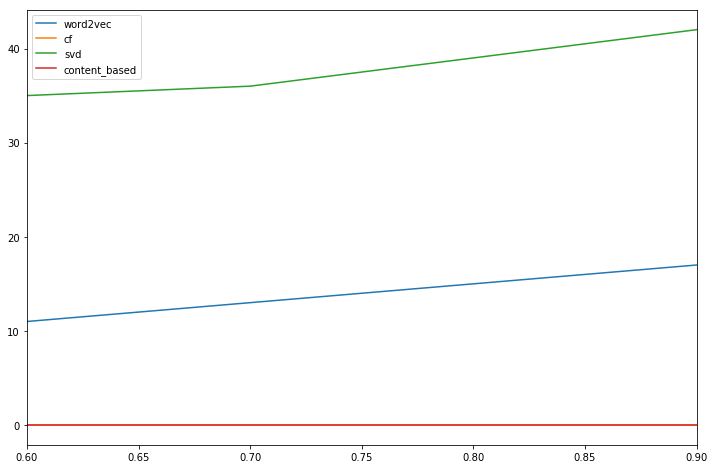

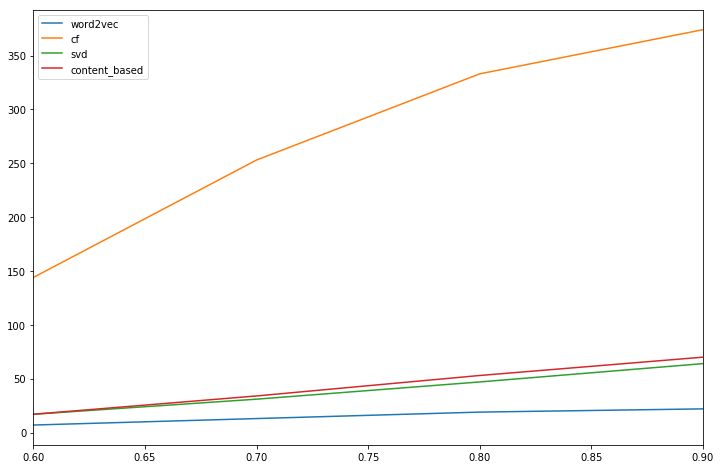

In [22]:
###
index_for_specific_time_overhead = 0 # 'train'
values = zip(*[[time_dict_avg[mn][tp][index_for_specific_time_overhead] for tp in all_tp] for mn in mn_list])
values = np.array(values)
#print 'values[0:', values[0]
df = pd.DataFrame(values, index=indexes, columns=mn_list)

df.plot()
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)

###
index_for_specific_time_overhead = 1 #'test'
values = zip(*[reversed([time_dict_avg[mn][tp][index_for_specific_time_overhead] for tp in all_tp]) for mn in mn_list])
values = np.array(values)
#print 'values[0:', values[0]
df = pd.DataFrame(values, index=indexes, columns=mn_list)

df.plot()

###
fig = plt.gcf()
fig.set_size_inches(12, 8, forward=True)

plt.show()

In [ ]:
cx.close()

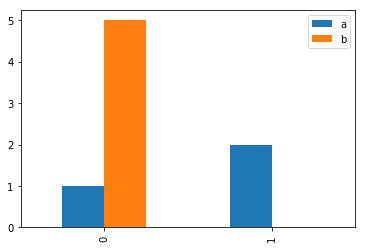

In [10]:
df2 = pd.DataFrame(np.array([
    [1, 5],
    [2, np.NaN],
]), columns=['a', 'b'])
df2.plot.bar()

plt.show()